In [7]:
import numpy                 #loading our favorite library
import matplotlib.pyplot as plt    #and the useful plotting library
from matplotlib import animation

nx = 41
dx = 2 / (nx - 1)
nt = 20    #the number of timesteps we want to calculate
nu = 0.3   #the value of viscosity
sigma = .2 #sigma is a parameter, we'll learn more about it later
dt = sigma * dx**2 / nu #dt is defined using sigma ... more later!


u = numpy.ones(nx)      #a numpy array with nx elements all equal to 1.
u[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s

un = numpy.ones(nx) #our placeholder array, un, to advance the solution in time
plt.plot(numpy.linspace(0, 2, nx), u);

<IPython.core.display.Javascript object>


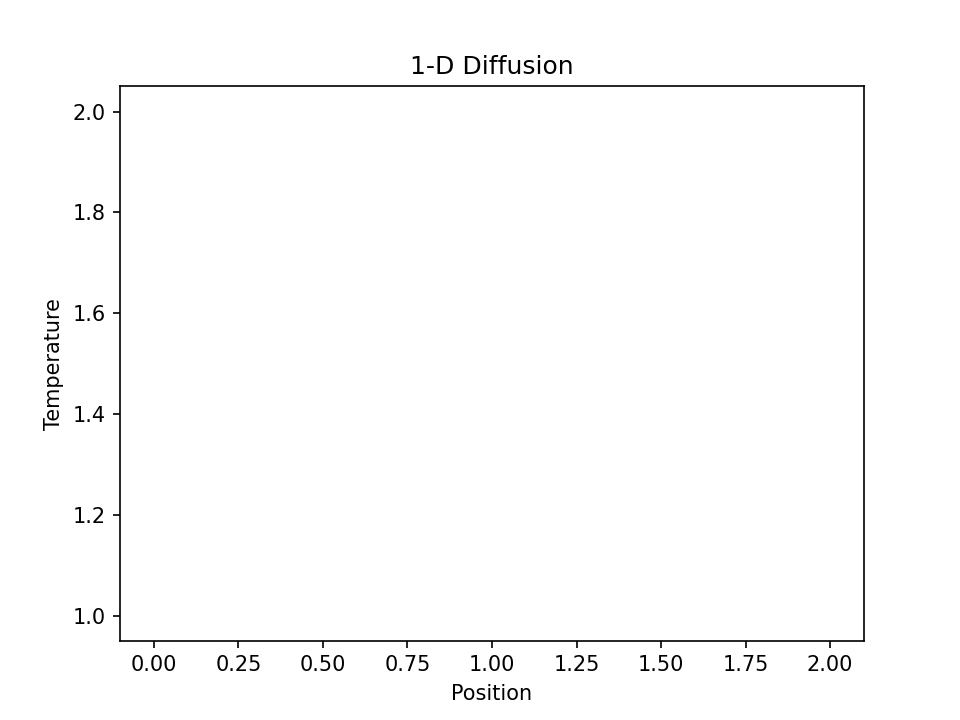

Text(0.5, 0, 'Position')

In [8]:
%matplotlib notebook
fig, ax = plt.subplots()

x = numpy.linspace(0, 2, nx)
line, = ax.plot(x,u)

def init():
    line.set_ydata([numpy.nan] * len(x))
    return line,

def animate(i):
    un = u.copy() 
    for i in range(1, nx - 1): 
        u[i] = un[i] + nu * dt / dx**2 * (un[i+1] - 2 * un[i] + un[i-1])
    line.set_ydata(u)
    return line,
    
ani = animation.FuncAnimation(
    fig, animate, init_func=init, frames=21, interval=300, blit=True)

plt.title("1-D Diffusion")
plt.ylabel("Temperature")
plt.xlabel("Position")